In [1]:
import pandas as pd

#데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

#데이터 분할:train, test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBC

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

#모델 성능 평가
from sklearn.metrics import confusion_matrix

#데이터 scaling
from sklearn.preprocessing import StandardScaler

#분류 SVM
from sklearn.svm import SVC


In [44]:
#데이터 불러오기

df_raw = pd.read_csv('유방암.csv',encoding='cp949')
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


In [45]:
#결측치 확인하기

df_raw.isnull().sum(axis=0)
#결측치 없음

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [62]:
#목표변수와 설명변수 지정

df_raw_y = df_raw['diagnosis'] #목표변수
df_raw_x = df_raw.drop('diagnosis', axis=1, inplace=False) #설명변수

In [47]:
#데이터 구성하기 - 더미변수 생성
#get_dummies : 데이터의 문자형 변수에 대한 더미변수 생성

df_raw_dummy = pd.get_dummies(df_raw_x)

#더미 변수로 생성된 데이터 확인
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [48]:
#데이터 구성하기 (데이터 분할 0.6:0.4)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


In [49]:
#SVC 모델 생성
#기본 옵션으로 모델 생성
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)

#train 데이터 셋 정확도
print('Accuracy on training set: {:.3f}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
#test 데이터 셋 정확도
print('Accuracy on test set: {:.3f}'.format(svm_uncustomized.score(df_test_x,df_test_y)))

#svc 모델 정확도는 train 88.5%, test 89.1%로, test가 더 높다.
#train과 test의 비율이 많이 다르지 않으므로 일반화에는 좋은 모델이나, 정확도는 높지 않다.

Accuracy on training set: 0.885
Accuracy on test set: 0.891


In [50]:
#SVC 모델 Parameter 변경
#C: 규제에 대한 강도 변경

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

#c 규제 (0.01, 0.1, 1, 10)
para_c = [10**c for c in range(-2,2)]

for v_C in para_c :
    svm = SVC(random_state=1234, C=v_C)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

#데이터 저장하고, C별 정확도 확인    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['MinSamplesLeaf'] =para_c
df_accuracy_c['TrainAccuracy'] =train_accuracy
df_accuracy_c['TestAccuracy'] =test_accuracy
df_accuracy_c.round(3) 

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.854,0.859
2,1.00,0.885,0.891
3,10.00,0.906,0.922


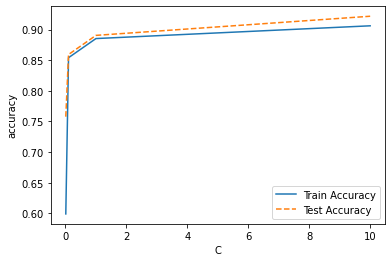

In [51]:
#모델 정확도 그래프로 확인

plt.plot(para_c, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()

In [52]:
## 데이터 확인 불가능
## c값 변경하여 다시 확인

In [53]:
#SVC 모델 Parameter 변경
#C: 규제에 대한 강도 변경

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

#c 규제 (0.01, 0.1, 1, 10)
para_c = [0.1**c for c in range(1,10)]

for v_C in para_c :
    svm = SVC(random_state=1234, C=v_C)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

#데이터 저장하고, C별 정확도 확인    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] =para_c
df_accuracy_c['TrainAccuracy'] =train_accuracy
df_accuracy_c['TestAccuracy'] =test_accuracy
df_accuracy_c.round(3) 

,C,TrainAccuracy,TestAccuracy
0,0.100,0.854,0.859
1,0.010,0.599,0.758
2,0.001,0.599,0.758
3,0.000,0.599,0.758
4,0.000,0.599,0.758
5,0.000,0.599,0.758
6,0.000,0.599,0.758
7,0.000,0.599,0.758
8,0.000,0.599,0.758


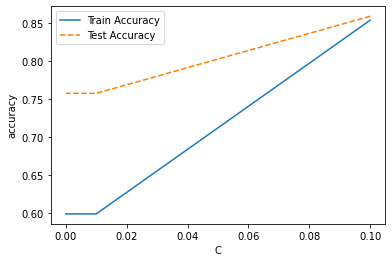

In [54]:
#모델 정확도 그래프로 확인

plt.plot(para_c, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()

## C가 작을수록 이상치 포함 가능성이 높은 경우로, 오류를 많이 허용한다. (과소적합)
## C가 클수록 오류를 적게 허용한다. (과대적합)
## 얼마나 많은 데이터를 다른 클래스에 놓이는 것을 허용하는 지 결정하는 것이므로, C를 0.1로 선정

In [55]:
#SVC 모델 Parameter 변경
#C = 0.1
#gamma : 훈련 샘플이 미치는 영향의 범위를 변경

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

#gamma 규제 (0.01, 0.1, 1, 10)
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma :
    svm = SVC(random_state=1234, gamma=v_gamma, C=0.1)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

#데이터 저장하고, C별 정확도 확인    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] =para_gamma
df_accuracy_gamma['TrainAccuracy'] =train_accuracy
df_accuracy_gamma['TestAccuracy'] =test_accuracy
df_accuracy_gamma.round(3) 

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.599,0.758
2,1.00,0.599,0.758
3,10.00,0.599,0.758


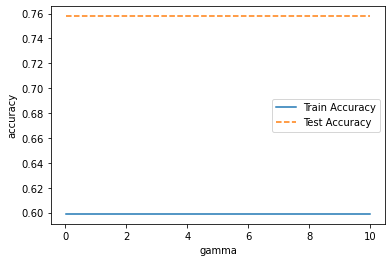

In [56]:
#모델 정확도 그래프로 확인

plt.plot(para_gamma, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('gamma')
plt.legend()

## gamma가 작을수록 1개 데이터의 영향력 거리가 커진다.
## gamma가 클수록 1개 데이터의 영향력 거리가 짧아진다. (구불구불한 모양)
## gamma는 Gaussian 함수의 표준편차와 반대이고, 결정 경계의 곡률을 조정한다.
## 위 경우, gamma의 변화는 정확도에 영향을 미치지 않음을 뜻한다.
## 즉, SVC는 scale을 설정해야 함을 알 수 있다.

In [92]:
#scale 변환
#standardscaler : 설명변수 값의 구간을 동일하게 변경한다.

#변수명 저장
v_feature_name = df_train_x.columns

#StandardScale 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [93]:
#데이터 분할 및 저장

df_scaled_train_x, df_scaled_test_x= train_test_split(df_scaled, test_size=0.4, random_state=1234)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))

train data X size:(192, 30)
test data X size:(128, 30)


In [95]:
#scale 조정 후 데이터로 새로운 모델 생성

svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

#train 데이터 셋 정확도
print('Accuracy on training set:{:.3f}'.format(svm_scaled.score(df_scaled_train_x, df_train_y)))
#test 데이터 셋 정확도
print('Accuracy on test set:{:.3f}'.format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set:0.995
Accuracy on test set:0.961


## scale 조정 후, 모델의 train 정확도는 99.4%, test 정확도는 96.1% 이다.
## 이는 scale 조정 전의 모델과 정확도가 많이 높아짐을 알 수 있다.
## train과 test의 비율이 많이 다르지 않으므로 일반화에 좋은 모델이고, 
## 정확도 또한 높기 때문에, 좋은 모델이라고 할 수 있다.

In [81]:
#SVC 모델 Parameter 변경
#C: 규제에 대한 강도 변경

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

#c 규제 (0.01, 0.1, 1, 10)
para_c = [0.1**c for c in range(1,10)]

for v_C in para_c :
    svm = SVC(random_state=1234, C=v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))

#데이터 저장하고, C별 정확도 확인    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] =para_c
df_accuracy_c['TrainAccuracy'] =train_accuracy
df_accuracy_c['TestAccuracy'] =test_accuracy
df_accuracy_c.round(3) 

,C,TrainAccuracy,TestAccuracy
0,0.100,0.964,0.906
1,0.010,0.599,0.758
2,0.001,0.599,0.758
3,0.000,0.599,0.758
4,0.000,0.599,0.758
5,0.000,0.599,0.758
6,0.000,0.599,0.758
7,0.000,0.599,0.758
8,0.000,0.599,0.758


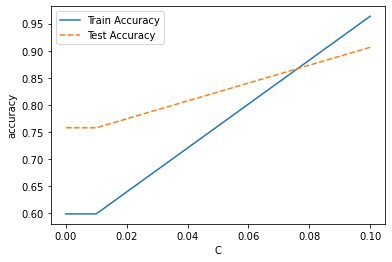

In [82]:
#모델 정확도 그래프로 확인

plt.plot(para_c, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()

In [83]:
## 모델의 정확도를 자세히 살필 수 없기 때문에, 구간을 변경하여 정확도 확인
#scale 변환 후의 SVC 모델 Parameter 변경
#C: 규제에 대한 강도 변경

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

#c 규제 (0.01, 0.1, 1, 10)
para_c = [10**c for c in range(-2,2)]

for v_C in para_c :
    svm = SVC(random_state=1234, C=v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))

#데이터 저장하고, C별 정확도 확인    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] =para_c
df_accuracy_c['TrainAccuracy'] =train_accuracy
df_accuracy_c['TestAccuracy'] =test_accuracy
df_accuracy_c.round(3) 

,C,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.964,0.906
2,1.00,0.995,0.961
3,10.00,1.000,0.961


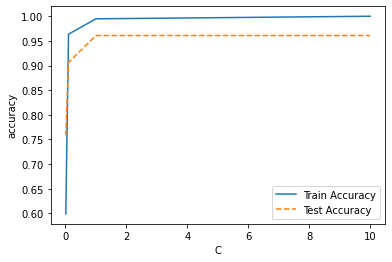

In [84]:
#모델 정확도 그래프로 확인

plt.plot(para_c, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()

## C가 작을수록 이상치 포함 가능성이 높은 경우로, 오류를 많이 허용한다. (과소적합)
## C가 클수록 오류를 적게 허용한다. (과대적합)
## 얼마나 많은 데이터를 다른 클래스에 놓이는 것을 허용하는 지 결정하는 것이므로, 
## C가 0.1 일 때, 0.95와 0.90이므로, 정확도가 많이 증가할 때임이 확인 가능하므로 1 선정

In [87]:
#scale 변환 후의 SVC 모델 Parameter 변경
#C = 1
#gamma : 훈련 샘플이 미치는 영향의 범위를 변경

train_accuracy =[] #train 정확도 결과 저장
test_accuracy=[] #test 정확도 결과 저장

#gamma 규제 (0.01, 0.1, 1, 10)
para_gamma = [0.1**gamma for gamma in range(1,10)]

for v_gamma in para_gamma :
    svm = SVC(random_state=1234, gamma=v_gamma, C=1)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))

#데이터 저장하고, C별 정확도 확인    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] =para_gamma
df_accuracy_gamma['TrainAccuracy'] =train_accuracy
df_accuracy_gamma['TestAccuracy'] =test_accuracy
df_accuracy_gamma.round(3) 

,gamma,TrainAccuracy,TestAccuracy
0,0.100,0.599,0.758
1,0.010,0.599,0.758
2,0.001,0.599,0.758
3,0.000,0.599,0.758
4,0.000,0.599,0.758
5,0.000,0.401,0.242
6,0.000,0.401,0.242
7,0.000,0.401,0.242
8,0.000,0.599,0.758


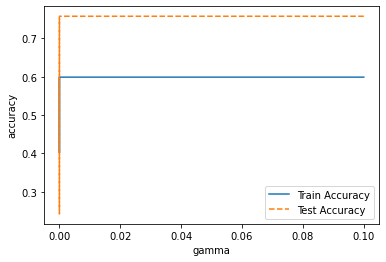

In [88]:
#모델 정확도 그래프로 확인

plt.plot(para_gamma, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('gamma')
plt.legend()

## gamma가 para_gamma = [10**gamma for gamma in range(-2,2)] 에서 확인 불가능해서,
## gamma의 값을 변경하여 확인하였고, 이에 따라 gamma의 값을 0.001로 설정하였다.
## gamma가 작을수록 1개 데이터의 영향력 거리가 커지고, 클수록 1개 데이터의 영향력 거리가 짧아지므로(구불구불한 모양), gamma는 결정 경계의 곡률을 조정함을 알 수 있다.
## 또한 gamma는 Gaussian 함수의 표준편차와 반대이다.

In [91]:
#결론 도출
#최종 모델 선택 (gamma는 0.001, C는 1)

svc_final = SVC(gamma=0.001, C=1, random_state=1234) #최종모델
svc_final.fit(df_scaled_train_x, df_train_y)

#평가
y_pred=svc_final.predict(df_scaled_test_x)

#train 데이터 셋 정확도
print('Accuracy on training set:{:.3f}'.format(svc_final.score(df_scaled_train_x, df_train_y)))
#test 데이터 셋 정확도
print('Accuracy on test set:{:.3f}'.format(svc_final.score(df_scaled_test_x, df_test_y)))
#confusion matrix
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.984
Accuracy on test set:0.930
Confusion matrix:
[[29  2]
 [ 7 90]]


## 위를 통해, scaled 한 SVC모델의 train 정확도는 98.4%, test 데이터는 93.0% 임을 알 수 있고,
## 이에 따라, train 데이터가 부분적으로 과대적합 되어 있음을 알 수 있다.
## 또한 scaled 후 SVC 모델의 정확도에 비해 gamma와 C값을 직접 정한 SVC 모델의 정확도가
## 떨어졌으므로, gamma와 C값의 데이터를 좋게 설정했다고 보기 어렵다.
## Confusion matrix를 통해, 정분류율은 92.97% 오분류율은 7.03%임을 알 수 있다.
